<a href="https://colab.research.google.com/github/3srava0/assignment-3/blob/main/Model_Development_with_train_validation_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Day 4: Model Development
# Real Estate Investment Advisor System
print("="*60)
print("MODEL DEVELOPMENT - CLASSIFICATION & REGRESSION")
print("="*60)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    # Classification metrics
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    # Regression metrics
    mean_squared_error, mean_absolute_error, r2_score
)

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

print("\n✅ All libraries imported successfully!")


MODEL DEVELOPMENT - CLASSIFICATION & REGRESSION
Mounted at /content/drive

✅ All libraries imported successfully!


In [2]:
# Load dataset with target variables
df = pd.read_csv('/content/drive/MyDrive/assignment-3/data/data_with_targets.csv')

print(f"Dataset loaded: {df.shape}")
print(f"\nColumns: {len(df.columns)}")
print(f"\nTarget variables:")
print(f"  - Good_Investment (Classification): {df['Good_Investment'].nunique()} classes")
print(f"  - Future_Price_5Y (Regression): Continuous values")
print(f"\nFirst few rows:")
df.head()


Dataset loaded: (250000, 27)

Columns: 27

Target variables:
  - Good_Investment (Classification): 2 classes
  - Future_Price_5Y (Regression): Continuous values

First few rows:


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Future_Price_5Y,City_Median_Price,City_Median_Price_per_SqFt,Good_Investment
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,719.618119,256.915,0.09,0
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,287.283026,258.930,0.10,1
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,270.047807,249.420,0.09,1
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,441.224528,252.480,0.09,0
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,268.740105,251.630,0.09,1


In [3]:
# Select features for modeling
print("\n" + "="*60)
print("FEATURE SELECTION & PREPROCESSING")
print("="*60)

# Columns to drop
columns_to_drop = [
    'ID',  # Identifier, not useful for prediction
    'Price_in_Lakhs',  # Target variable for regression (we use Future_Price_5Y)
    'Good_Investment',  # Classification target
    'Future_Price_5Y',  # Regression target
    'City_Median_Price',  # Helper column
    'City_Median_Price_per_SqFt'  # Helper column (if exists)
]

# Remove columns that don't exist
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Separate features and targets
X = df.drop(columns=columns_to_drop)
y_classification = df['Good_Investment']
y_regression = df['Future_Price_5Y']

print(f"\nFeatures shape: {X.shape}")
print(f"Classification target shape: {y_classification.shape}")
print(f"Regression target shape: {y_regression.shape}")

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")



FEATURE SELECTION & PREPROCESSING

Features shape: (250000, 21)
Classification target shape: (250000,)
Regression target shape: (250000,)

Categorical columns (12): ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']
Numerical columns (9): ['BHK', 'Size_in_SqFt', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals']


In [4]:
# Encode categorical variables
print("\n" + "="*60)
print("ENCODING CATEGORICAL VARIABLES")
print("="*60)

# Create a copy for encoding
X_encoded = X.copy()

# Label encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le
    print(f"✅ Encoded: {col} ({X_encoded[col].nunique()} unique values)")

print(f"\nFinal feature set shape: {X_encoded.shape}")
print(f"All features are now numerical: {X_encoded.select_dtypes(include=[np.number]).shape[1]} columns")



ENCODING CATEGORICAL VARIABLES
✅ Encoded: State (20 unique values)
✅ Encoded: City (42 unique values)
✅ Encoded: Locality (500 unique values)
✅ Encoded: Property_Type (3 unique values)
✅ Encoded: Furnished_Status (3 unique values)
✅ Encoded: Public_Transport_Accessibility (3 unique values)
✅ Encoded: Parking_Space (2 unique values)
✅ Encoded: Security (2 unique values)
✅ Encoded: Amenities (325 unique values)
✅ Encoded: Facing (4 unique values)
✅ Encoded: Owner_Type (3 unique values)
✅ Encoded: Availability_Status (2 unique values)

Final feature set shape: (250000, 21)
All features are now numerical: 21 columns


In [5]:
# Split data: 60% train, 20% validation, 20% test
print("\n" + "="*60)
print("TRAIN/VALIDATION/TEST SPLIT")
print("="*60)

# First split: 80% train+val, 20% test
X_temp, X_test, y_class_temp, y_class_test, y_reg_temp, y_reg_test = train_test_split(
    X_encoded, y_classification, y_regression,
    test_size=0.20,
    random_state=42,
    stratify=y_classification  # Balanced split for classification
)

# Second split: 75% of temp = 60% overall train, 25% of temp = 20% overall validation
X_train, X_val, y_class_train, y_class_val, y_reg_train, y_reg_val = train_test_split(
    X_temp, y_class_temp, y_reg_temp,
    test_size=0.25,  # 0.25 * 0.80 = 0.20 of total
    random_state=42,
    stratify=y_class_temp
)

print(f"\n📊 Data Split Summary:")
print(f"  Train set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"  Validation set: {X_val.shape[0]:,} samples ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"  Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"\n✅ Split complete with stratification")



TRAIN/VALIDATION/TEST SPLIT

📊 Data Split Summary:
  Train set: 150,000 samples (60.0%)
  Validation set: 50,000 samples (20.0%)
  Test set: 50,000 samples (20.0%)

✅ Split complete with stratification


In [6]:
# Scale features for models that need it
print("\n" + "="*60)
print("FEATURE SCALING (StandardScaler)")
print("="*60)

scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Features scaled using StandardScaler")
print(f"   Mean: {X_train_scaled.mean().mean():.6f}")
print(f"   Std: {X_train_scaled.std().mean():.6f}")



FEATURE SCALING (StandardScaler)
✅ Features scaled using StandardScaler
   Mean: 0.000000
   Std: 1.000003


In [7]:
# Train Classification Models - OPTIMIZED VERSION
print("\n" + "="*60)
print("TRAINING CLASSIFICATION MODELS (OPTIMIZED)")
print("="*60)

from joblib import Parallel, delayed
import time

# Initialize classification models (optimized parameters)
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=50, n_jobs=-1, max_depth=15),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=50, max_depth=5),
    'XGBoost': XGBClassifier(random_state=42, n_estimators=50, n_jobs=-1, max_depth=5, eval_metric='logloss'),
    'AdaBoost': AdaBoostClassifier(random_state=42, n_estimators=50),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    'Naive Bayes': GaussianNB()
}

# Function to train a single model
def train_classification_model(name, model, X_train, X_train_scaled, y_train, X_val, X_val_scaled, y_val):
    start_time = time.time()

    # Use scaled data for models that benefit from it
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_val_pred = model.predict(X_val_scaled)
        y_val_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_pred_proba)

    training_time = time.time() - start_time

    return name, model, {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Training Time (s)': training_time
    }

# Train models in parallel
print("Training models in parallel...")
start_total = time.time()

results = Parallel(n_jobs=-1, verbose=10)(
    delayed(train_classification_model)(
        name, model, X_train, X_train_scaled, y_class_train,
        X_val, X_val_scaled, y_class_val
    )
    for name, model in classification_models.items()
)

total_time = time.time() - start_total

# Store results
classification_results = {}
trained_classification_models = {}

for name, model, metrics in results:
    classification_results[name] = metrics
    trained_classification_models[name] = model
    print(f"\n✅ {name}")
    print(f"   Accuracy: {metrics['Accuracy']:.4f} | Precision: {metrics['Precision']:.4f} | "
          f"Recall: {metrics['Recall']:.4f} | F1: {metrics['F1-Score']:.4f} | ROC-AUC: {metrics['ROC-AUC']:.4f}")
    print(f"   Training Time: {metrics['Training Time (s)']:.2f}s")

print("\n" + "="*60)
print(f"✅ ALL CLASSIFICATION MODELS TRAINED IN {total_time:.2f}s")
print("="*60)



TRAINING CLASSIFICATION MODELS (OPTIMIZED)
Training models in parallel...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  1.2min remaining:   23.6s



✅ Logistic Regression
   Accuracy: 0.7993 | Precision: 0.8079 | Recall: 0.8812 | F1: 0.8430 | ROC-AUC: 0.8815
   Training Time: 0.45s

✅ Decision Tree
   Accuracy: 0.9874 | Precision: 0.9908 | Recall: 0.9886 | F1: 0.9897 | ROC-AUC: 0.9980
   Training Time: 2.45s

✅ Random Forest
   Accuracy: 0.9767 | Precision: 0.9953 | Recall: 0.9664 | F1: 0.9806 | ROC-AUC: 0.9985
   Training Time: 15.60s

✅ Gradient Boosting
   Accuracy: 0.9864 | Precision: 0.9948 | Recall: 0.9829 | F1: 0.9888 | ROC-AUC: 0.9990
   Training Time: 64.12s

✅ XGBoost
   Accuracy: 0.9932 | Precision: 0.9953 | Recall: 0.9936 | F1: 0.9944 | ROC-AUC: 0.9997
   Training Time: 2.27s

✅ AdaBoost
   Accuracy: 0.9349 | Precision: 0.9424 | Recall: 0.9516 | F1: 0.9470 | ROC-AUC: 0.9869
   Training Time: 15.12s

✅ K-Nearest Neighbors
   Accuracy: 0.7570 | Precision: 0.7801 | Recall: 0.8388 | F1: 0.8084 | ROC-AUC: 0.8160
   Training Time: 109.55s

✅ Naive Bayes
   Accuracy: 0.7382 | Precision: 0.7565 | Recall: 0.8429 | F1: 0.7973 | 

[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  2.5min finished



CLASSIFICATION MODELS - VALIDATION RESULTS

                      Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
XGBoost                0.9932     0.9953  0.9936    0.9944   0.9997   
Gradient Boosting      0.9864     0.9948  0.9829    0.9888   0.9990   
Random Forest          0.9767     0.9953  0.9664    0.9806   0.9985   
Decision Tree          0.9874     0.9908  0.9886    0.9897   0.9980   
AdaBoost               0.9349     0.9424  0.9516    0.9470   0.9869   
Logistic Regression    0.7993     0.8079  0.8812    0.8430   0.8815   
K-Nearest Neighbors    0.7570     0.7801  0.8388    0.8084   0.8160   
Naive Bayes            0.7382     0.7565  0.8429    0.7973   0.8019   

                     Training Time (s)  
XGBoost                         2.2677  
Gradient Boosting              64.1215  
Random Forest                  15.6017  
Decision Tree                   2.4488  
AdaBoost                       15.1177  
Logistic Regression             0.4473  
K-Nearest Neighbors        

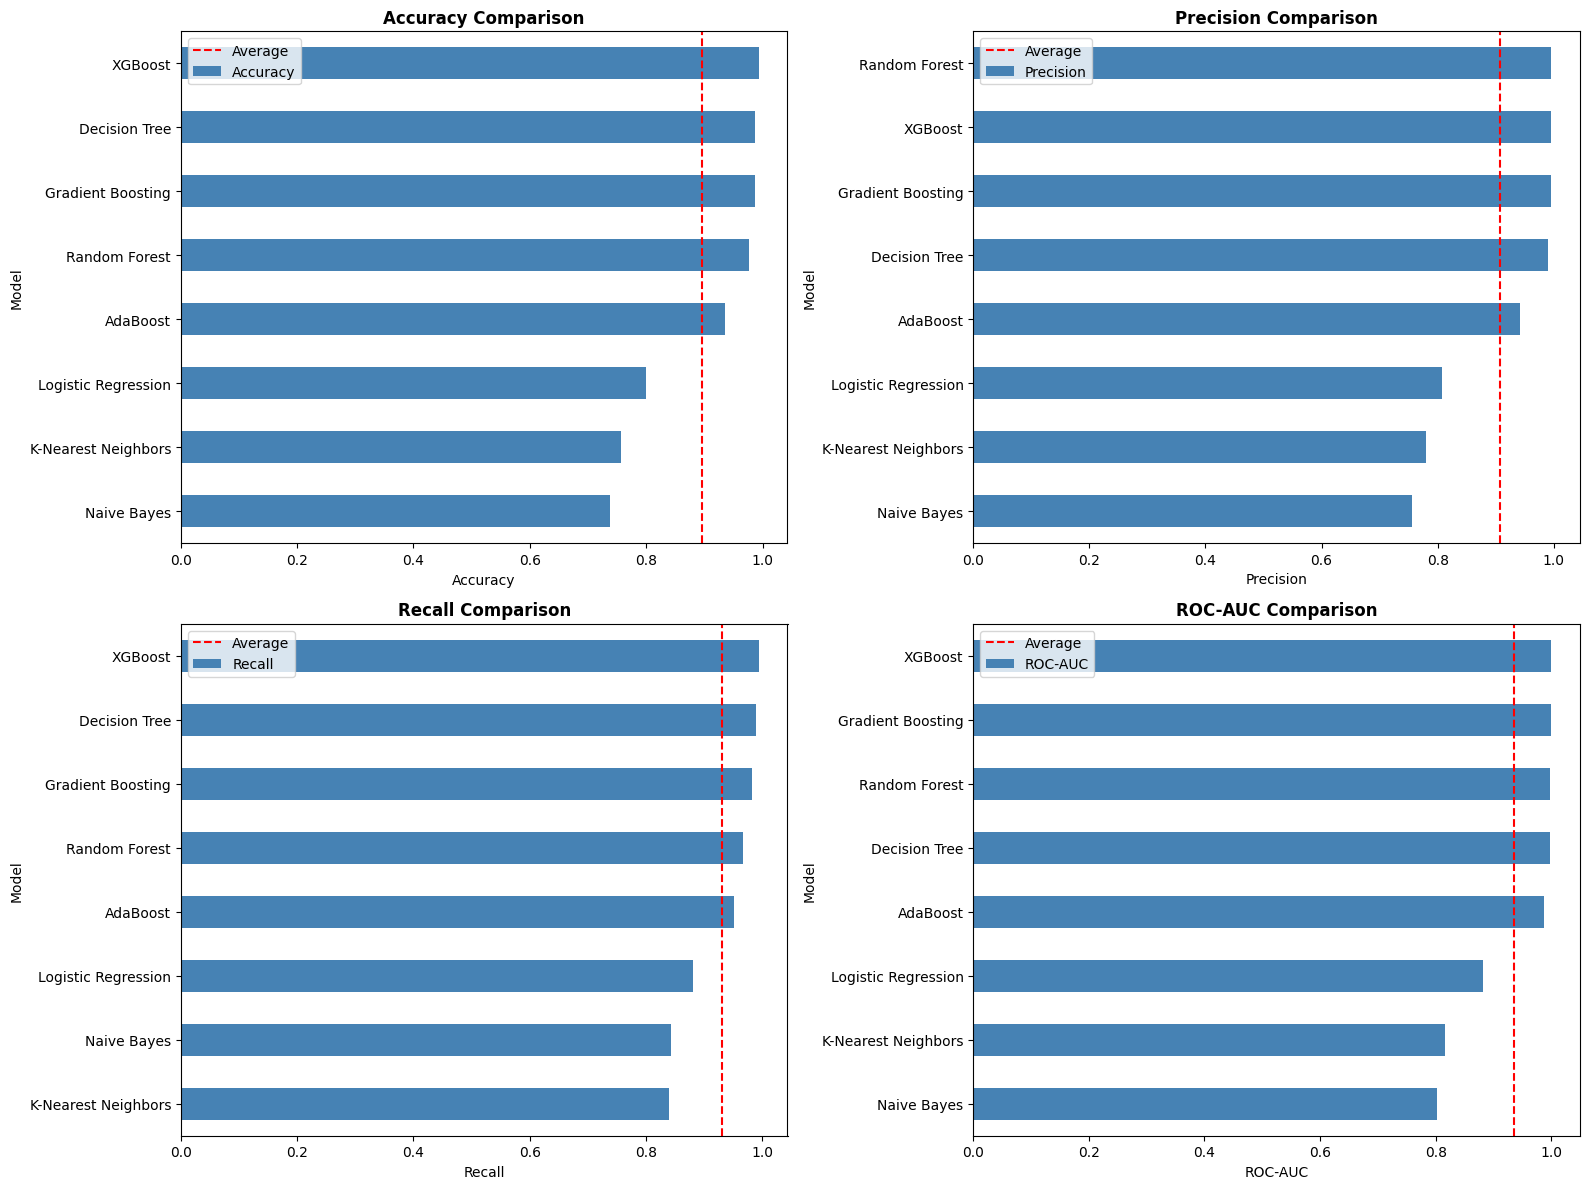

In [8]:
# Display classification results
print("\n" + "="*60)
print("CLASSIFICATION MODELS - VALIDATION RESULTS")
print("="*60)

results_df = pd.DataFrame(classification_results).T
results_df = results_df.sort_values('ROC-AUC', ascending=False)

print("\n", results_df.round(4))

# Find best model
best_model_name = results_df['ROC-AUC'].idxmax()
best_score = results_df.loc[best_model_name, 'ROC-AUC']

print(f"\n🏆 Best Classification Model: {best_model_name}")
print(f"   ROC-AUC Score: {best_score:.4f}")

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC-AUC']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    results_df[metric].sort_values(ascending=True).plot(kind='barh', ax=ax, color='steelblue')
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_xlabel(metric, fontsize=10)
    ax.set_ylabel('Model', fontsize=10)
    ax.axvline(x=results_df[metric].mean(), color='red', linestyle='--', label='Average')
    ax.legend()

plt.tight_layout()
plt.show()


In [9]:
# Train Regression Models - OPTIMIZED VERSION
print("\n" + "="*60)
print("TRAINING REGRESSION MODELS (OPTIMIZED)")
print("="*60)

# Initialize regression models (optimized parameters)
regression_models = {
    'Linear Regression': LinearRegression(n_jobs=-1),
    'Ridge Regression': Ridge(random_state=42, alpha=1.0),
    'Lasso Regression': Lasso(random_state=42, alpha=1.0, max_iter=500),
    'ElasticNet': ElasticNet(random_state=42, alpha=1.0, max_iter=500),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=50, n_jobs=-1, max_depth=15),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=50, max_depth=5),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=50, n_jobs=-1, max_depth=5),
    'AdaBoost': AdaBoostRegressor(random_state=42, n_estimators=50),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
}

# Function to train a single regression model
def train_regression_model(name, model, X_train, X_train_scaled, y_train, X_val, X_val_scaled, y_val):
    start_time = time.time()

    # Use scaled data for linear models and KNN
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_val_pred = model.predict(X_val_scaled)
    else:
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)

    # Calculate metrics
    mae = mean_absolute_error(y_val, y_val_pred)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_val_pred)

    training_time = time.time() - start_time

    return name, model, {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Training Time (s)': training_time
    }

# Train models in parallel
print("Training models in parallel...")
start_total = time.time()

results_reg = Parallel(n_jobs=-1, verbose=10)(
    delayed(train_regression_model)(
        name, model, X_train, X_train_scaled, y_reg_train,
        X_val, X_val_scaled, y_reg_val
    )
    for name, model in regression_models.items()
)

total_time_reg = time.time() - start_total

# Store results
regression_results = {}
trained_regression_models = {}

for name, model, metrics in results_reg:
    regression_results[name] = metrics
    trained_regression_models[name] = model
    print(f"\n✅ {name}")
    print(f"   MAE: {metrics['MAE']:.4f} | RMSE: {metrics['RMSE']:.4f} | R²: {metrics['R²']:.4f}")
    print(f"   Training Time: {metrics['Training Time (s)']:.2f}s")

print("\n" + "="*60)
print(f"✅ ALL REGRESSION MODELS TRAINED IN {total_time_reg:.2f}s")
print("="*60)



TRAINING REGRESSION MODELS (OPTIMIZED)
Training models in parallel...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.18079161643981934s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (97.6439938545227s.) Setting batch_size=1.



✅ Linear Regression
   MAE: 118.8625 | RMSE: 147.9439 | R²: 0.4942
   Training Time: 0.20s

✅ Ridge Regression
   MAE: 118.8629 | RMSE: 147.9439 | R²: 0.4942
   Training Time: 0.06s

✅ Lasso Regression
   MAE: 119.3124 | RMSE: 147.9355 | R²: 0.4942
   Training Time: 0.14s

✅ ElasticNet
   MAE: 142.5231 | RMSE: 166.1293 | R²: 0.3622
   Training Time: 0.11s

✅ Decision Tree
   MAE: 14.1817 | RMSE: 18.5195 | R²: 0.9921
   Training Time: 1.84s

✅ Random Forest
   MAE: 10.1231 | RMSE: 12.9957 | R²: 0.9961
   Training Time: 94.37s

✅ Gradient Boosting
   MAE: 12.8649 | RMSE: 16.1712 | R²: 0.9940
   Training Time: 96.31s

✅ XGBoost
   MAE: 11.6710 | RMSE: 14.5227 | R²: 0.9951
   Training Time: 1.90s

✅ AdaBoost
   MAE: 58.2734 | RMSE: 70.5852 | R²: 0.8849
   Training Time: 39.31s

✅ K-Nearest Neighbors
   MAE: 149.8202 | RMSE: 180.8969 | R²: 0.2437
   Training Time: 64.10s

✅ ALL REGRESSION MODELS TRAINED IN 163.12s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.7min finished



REGRESSION MODELS - VALIDATION RESULTS

                           MAE         MSE      RMSE      R²  Training Time (s)
Random Forest         10.1231    168.8870   12.9957  0.9961            94.3702
XGBoost               11.6710    210.9101   14.5227  0.9951             1.9018
Gradient Boosting     12.8649    261.5090   16.1712  0.9940            96.3091
Decision Tree         14.1817    342.9708   18.5195  0.9921             1.8362
AdaBoost              58.2734   4982.2720   70.5852  0.8849            39.3101
Lasso Regression     119.3124  21884.9177  147.9355  0.4942             0.1431
Ridge Regression     118.8629  21887.4065  147.9439  0.4942             0.0636
Linear Regression    118.8625  21887.4104  147.9439  0.4942             0.2021
ElasticNet           142.5231  27598.9355  166.1293  0.3622             0.1112
K-Nearest Neighbors  149.8202  32723.6850  180.8969  0.2437            64.1046

🏆 Best Regression Model: Random Forest
   R² Score: 0.9961
   RMSE: 12.9957


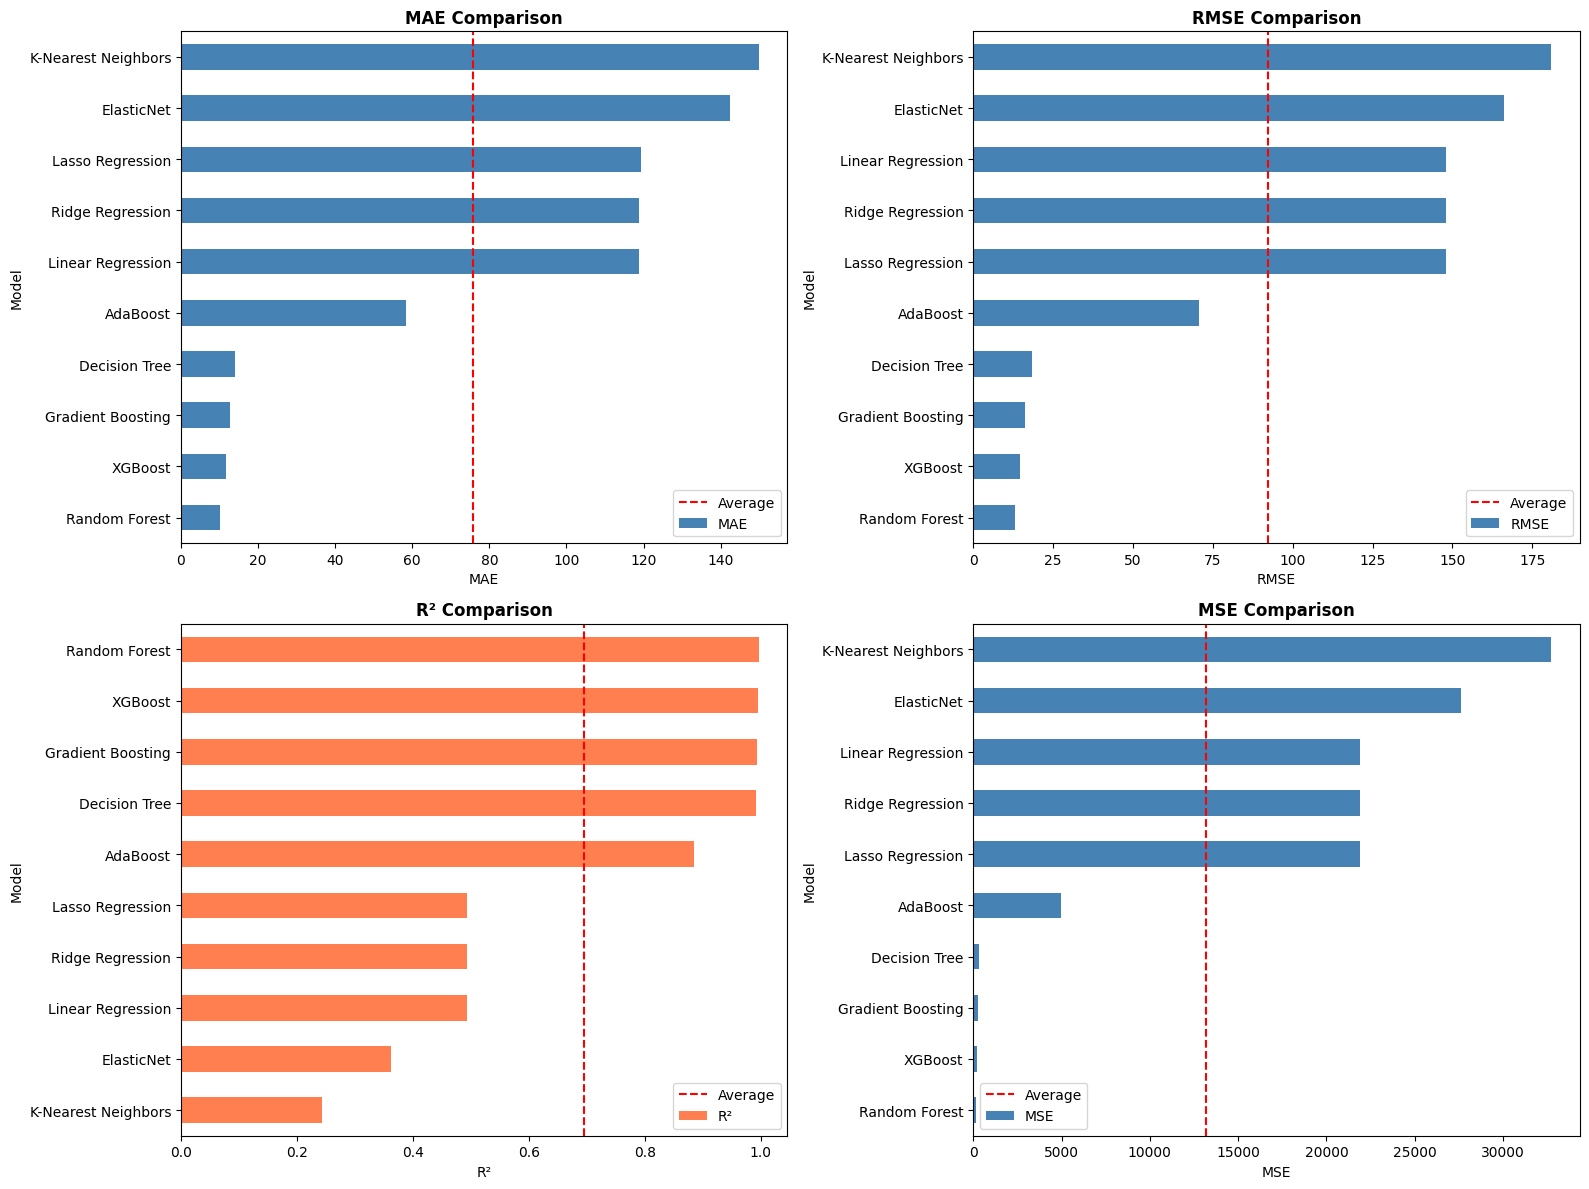

In [10]:
# Display regression results
print("\n" + "="*60)
print("REGRESSION MODELS - VALIDATION RESULTS")
print("="*60)

results_df_reg = pd.DataFrame(regression_results).T
results_df_reg = results_df_reg.sort_values('R²', ascending=False)

print("\n", results_df_reg.round(4))

# Find best model
best_model_name_reg = results_df_reg['R²'].idxmax()
best_score_reg = results_df_reg.loc[best_model_name_reg, 'R²']

print(f"\n🏆 Best Regression Model: {best_model_name_reg}")
print(f"   R² Score: {best_score_reg:.4f}")
print(f"   RMSE: {results_df_reg.loc[best_model_name_reg, 'RMSE']:.4f}")

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics_reg = ['MAE', 'RMSE', 'R²', 'MSE']
for idx, metric in enumerate(metrics_reg):
    ax = axes[idx // 2, idx % 2]
    if metric == 'R²':
        results_df_reg[metric].sort_values(ascending=True).plot(kind='barh', ax=ax, color='coral')
    else:
        results_df_reg[metric].sort_values(ascending=True).plot(kind='barh', ax=ax, color='steelblue')
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_xlabel(metric, fontsize=10)
    ax.set_ylabel('Model', fontsize=10)
    ax.axvline(x=results_df_reg[metric].mean(), color='red', linestyle='--', label='Average')
    ax.legend()

plt.tight_layout()
plt.show()



CONFUSION MATRIX - XGBoost


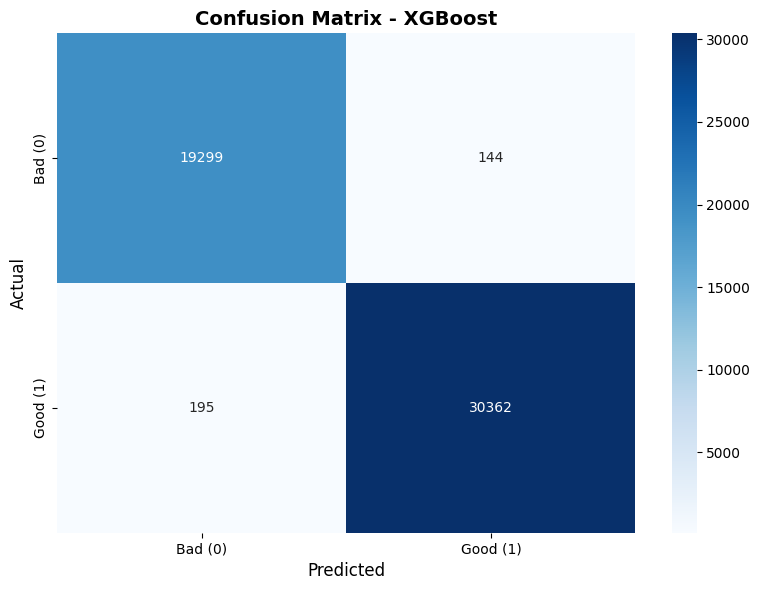


Classification Report:
              precision    recall  f1-score   support

     Bad (0)       0.99      0.99      0.99     19443
    Good (1)       1.00      0.99      0.99     30557

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



In [11]:
# Confusion Matrix for Best Classification Model
print("\n" + "="*60)
print(f"CONFUSION MATRIX - {best_model_name}")
print("="*60)

best_clf_model = trained_classification_models[best_model_name]

# Get predictions
if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
    y_val_pred_best = best_clf_model.predict(X_val_scaled)
else:
    y_val_pred_best = best_clf_model.predict(X_val)

# Confusion matrix
cm = confusion_matrix(y_class_val, y_val_pred_best)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad (0)', 'Good (1)'],
            yticklabels=['Bad (0)', 'Good (1)'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_class_val, y_val_pred_best, target_names=['Bad (0)', 'Good (1)']))



PREDICTION ANALYSIS - Random Forest


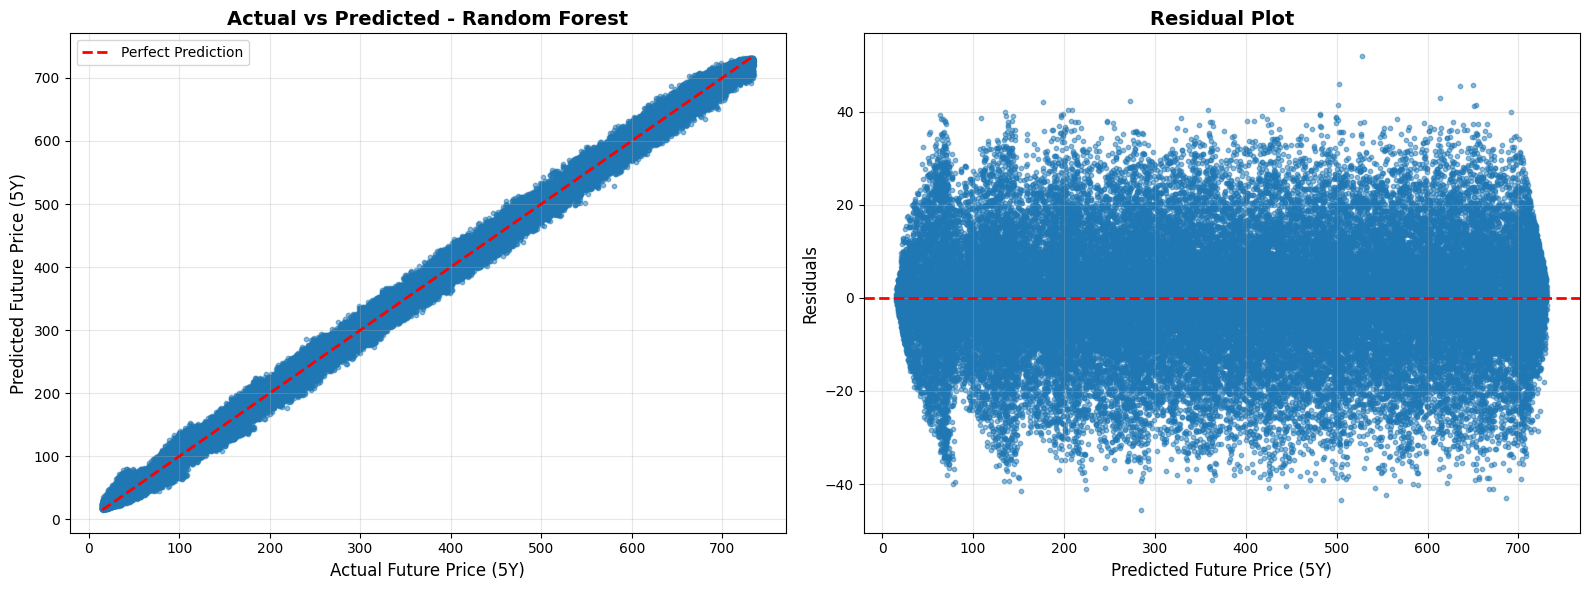


Residual Statistics:
  Mean: -0.0492
  Std Dev: 12.9957
  Min: -45.5865
  Max: 52.0017


In [12]:
# Prediction vs Actual for Best Regression Model
print("\n" + "="*60)
print(f"PREDICTION ANALYSIS - {best_model_name_reg}")
print("="*60)

best_reg_model = trained_regression_models[best_model_name_reg]

# Get predictions
if best_model_name_reg in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'K-Nearest Neighbors']:
    y_val_pred_best_reg = best_reg_model.predict(X_val_scaled)
else:
    y_val_pred_best_reg = best_reg_model.predict(X_val)

# Plot predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(y_reg_val, y_val_pred_best_reg, alpha=0.5, s=10)
axes[0].plot([y_reg_val.min(), y_reg_val.max()],
             [y_reg_val.min(), y_reg_val.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Future Price (5Y)', fontsize=12)
axes[0].set_ylabel('Predicted Future Price (5Y)', fontsize=12)
axes[0].set_title(f'Actual vs Predicted - {best_model_name_reg}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals plot
residuals = y_reg_val - y_val_pred_best_reg
axes[1].scatter(y_val_pred_best_reg, residuals, alpha=0.5, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Future Price (5Y)', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nResidual Statistics:")
print(f"  Mean: {residuals.mean():.4f}")
print(f"  Std Dev: {residuals.std():.4f}")
print(f"  Min: {residuals.min():.4f}")
print(f"  Max: {residuals.max():.4f}")


In [13]:
# Save best models
import pickle

print("\n" + "="*60)
print("SAVING BEST MODELS")
print("="*60)

# Create models directory
import os
models_dir = '/content/drive/MyDrive/assignment-3/models'
os.makedirs(models_dir, exist_ok=True)

# Save best classification model
clf_model_path = f'{models_dir}/best_classification_model.pkl'
with open(clf_model_path, 'wb') as f:
    pickle.dump(best_clf_model, f)
print(f"\n✅ Best Classification Model saved: {best_model_name}")
print(f"   Path: {clf_model_path}")

# Save best regression model
reg_model_path = f'{models_dir}/best_regression_model.pkl'
with open(reg_model_path, 'wb') as f:
    pickle.dump(best_reg_model, f)
print(f"\n✅ Best Regression Model saved: {best_model_name_reg}")
print(f"   Path: {reg_model_path}")

# Save scaler
scaler_path = f'{models_dir}/scaler.pkl'
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"\n✅ Scaler saved")
print(f"   Path: {scaler_path}")

# Save label encoders
encoders_path = f'{models_dir}/label_encoders.pkl'
with open(encoders_path, 'wb') as f:
    pickle.dump(label_encoders, f)
print(f"\n✅ Label Encoders saved")
print(f"   Path: {encoders_path}")



SAVING BEST MODELS

✅ Best Classification Model saved: XGBoost
   Path: /content/drive/MyDrive/assignment-3/models/best_classification_model.pkl

✅ Best Regression Model saved: Random Forest
   Path: /content/drive/MyDrive/assignment-3/models/best_regression_model.pkl

✅ Scaler saved
   Path: /content/drive/MyDrive/assignment-3/models/scaler.pkl

✅ Label Encoders saved
   Path: /content/drive/MyDrive/assignment-3/models/label_encoders.pkl


In [14]:
# Final summary
print("\n" + "="*60)
print("MODEL DEVELOPMENT SUMMARY")
print("="*60)

print("\n📊 CLASSIFICATION MODELS:")
print(f"   Total models trained: {len(classification_models)}")
print(f"   Best model: {best_model_name}")
print(f"   Best ROC-AUC: {best_score:.4f}")

print("\n📊 REGRESSION MODELS:")
print(f"   Total models trained: {len(regression_models)}")
print(f"   Best model: {best_model_name_reg}")
print(f"   Best R²: {best_score_reg:.4f}")

print("\n" + "="*60)
print("✅ MODEL DEVELOPMENT COMPLETE!")
print("="*60)
print("\nNext Steps:")
print("  1. MLflow Integration for experiment tracking")
print("  2. Hyperparameter tuning on best models")
print("  3. Final evaluation on test set")
print("  4. Streamlit app development")



MODEL DEVELOPMENT SUMMARY

📊 CLASSIFICATION MODELS:
   Total models trained: 8
   Best model: XGBoost
   Best ROC-AUC: 0.9997

📊 REGRESSION MODELS:
   Total models trained: 10
   Best model: Random Forest
   Best R²: 0.9961

✅ MODEL DEVELOPMENT COMPLETE!

Next Steps:
  1. MLflow Integration for experiment tracking
  2. Hyperparameter tuning on best models
  3. Final evaluation on test set
  4. Streamlit app development
